# Самоорганизующаяся карта признаков


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def FindClosest(x, w):
    dists = np.linalg.norm(x - w, axis=2) #ищем ближайный к точке x нейрон из сетки
    return np.unravel_index(np.argmin(dists, axis=None), dists.shape) #и его номер
def rad(a, epoch):      # радиус обучения
    return a * epoch**(-0.5)
def UpdateMap(epoch, w, x, n, a):
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            dist = np.linalg.norm(np.array([i, j]) - n) #расстояние от координатов текущего нейрона (мы бегаем сейчас по сетке)
#до того нейрона, который ближе всего к точке x выборки X (у этого нейрона номер n)
            h = np.exp(-(dist**2) / (2 * (rad(a, epoch)**2))) #функция от расстояния 
            sigma = epoch**(-0.2) #скорость обучения
            w[i][j] += h * sigma * (x - w[i][j])
    return w
def PlotMap(X, SOFM, par='graph'):
    if (par == 'graph'):
        plt.scatter(X[:, 0], X[:, 1], c='black')
        plt.plot(SOFM[:,:,0], SOFM[:,:,1])
        for j in range(SOFM.shape[0]):
            plt.plot(SOFM[j,:,0], SOFM[j,:,1])
        plt.show()
    else:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.5), subplot_kw=dict(xticks=[], yticks=[]))
        ax[0].imshow(X.reshape(50, 50, X.shape[-1]))
        ax[0].title.set_text('Выборка')
        ax[1].imshow(SOFM.astype(int))
        ax[1].title.set_text('Сетка СОФМ')
        plt.show()

In [3]:
def Training(X, SOFM, a, epoch, par='graph'):
    PlotMap(X, SOFM, par)
    for i in range(1, epoch+1):
    #i = 0; w_old = SOFM * 2
    #while (w_old != SOFM).all():
        #print((w_old == SOFM).all); i+=1 ; w_old = SOFM
        for x in X:
            dist = np.inf
            n = FindClosest(x, SOFM)
            SOFM = UpdateMap(i, SOFM, x, n, a)
        if (i % 5 == 0 and i < 20) or i % 20 == 0 or i == epoch:
            print(f'На {i}-й эпохе')
            PlotMap(X, SOFM, par)
    return SOFM

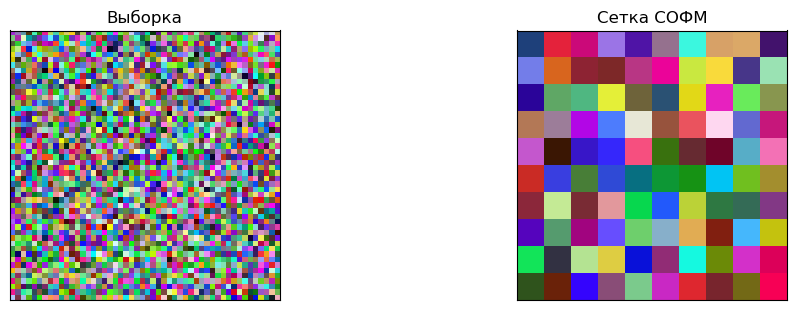

На 5-й эпохе


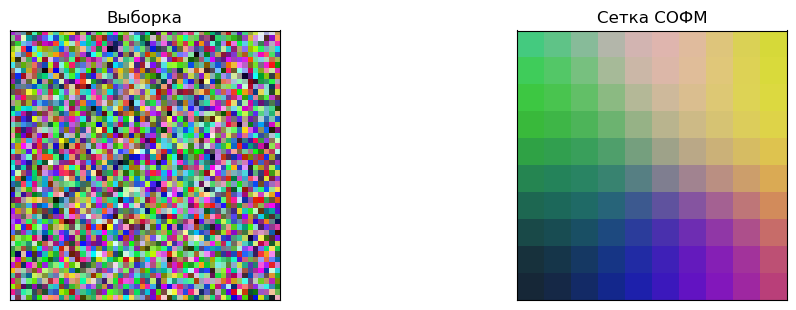

На 10-й эпохе


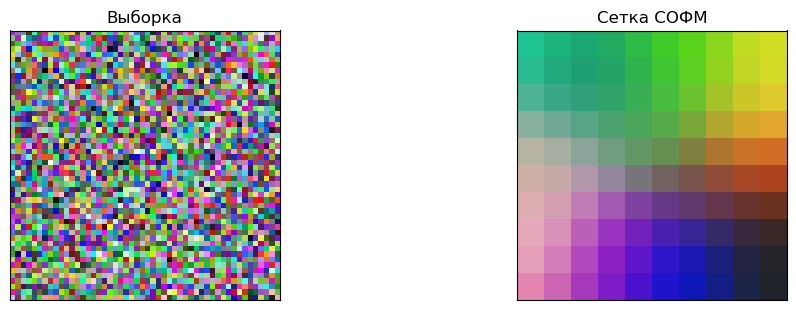

На 15-й эпохе


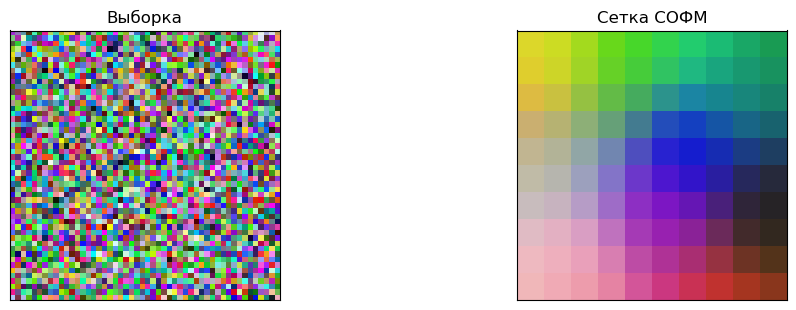

На 20-й эпохе


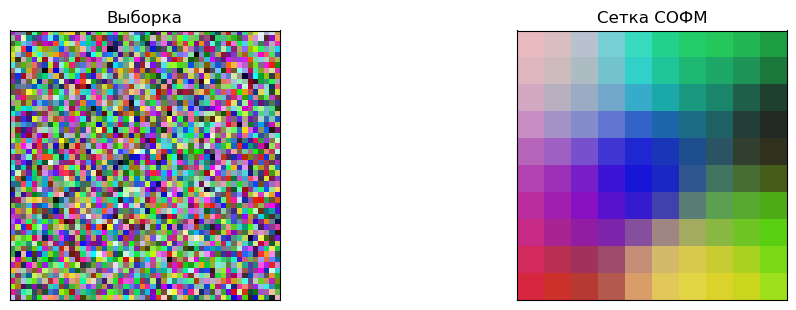

На 40-й эпохе


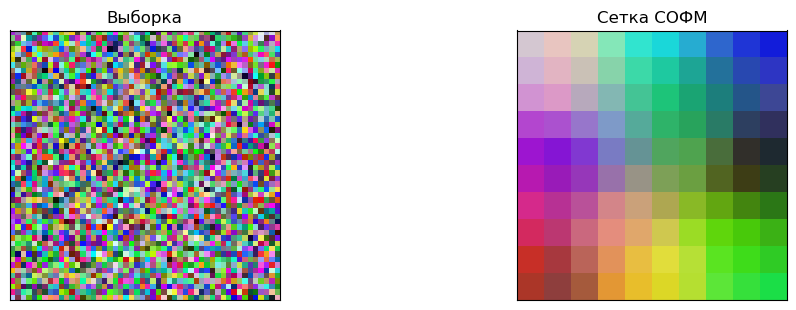

На 60-й эпохе


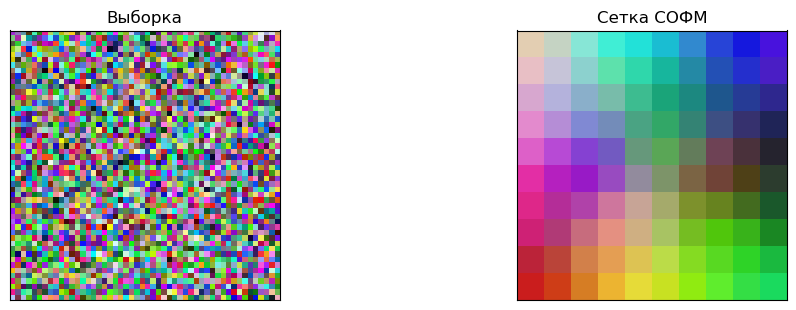

На 70-й эпохе


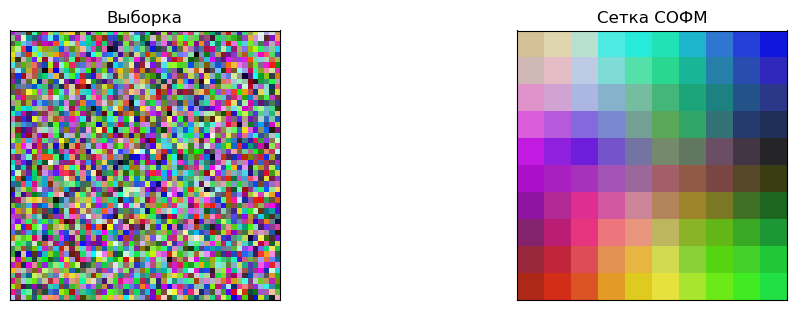

In [4]:
X = np.random.RandomState().randint(0, 255, (2500, 3))
#X = np.full((100, 3), 150)
SOFM = np.random.RandomState().randint(0, 255, (10, 10, 3)).astype(float)
SOFM = Training(X, SOFM, 5, 70, par='img')

In [5]:
X = np.arange(-5, 5, 0.25)
X = np.column_stack((X, -X**2))

In [6]:
dopX = np.random.uniform(low=np.min(X[:, 0]), high=np.max(X[:, 0]), size=(50))

In [7]:
dopY = [np.random.RandomState().randint(np.min(X[:, 1]), -x**2) for x in dopX]
#dopY = np.random.uniform(low=np.min(X[:, 1]), high=np.max(X[:, 1]), size=(40))#

In [8]:
dop = np.column_stack((dopX, dopY)) #добавление ещё точек под параболу

In [9]:
X = np.row_stack((X, dop))

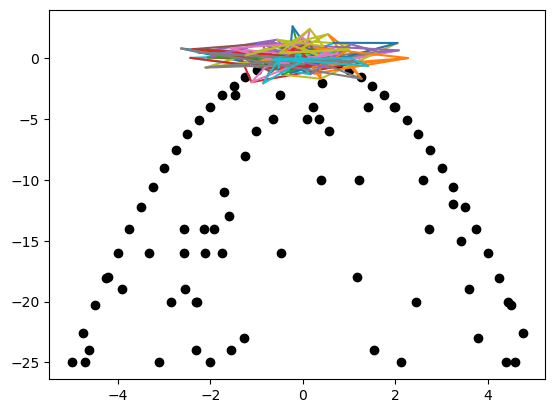

На 5-й эпохе


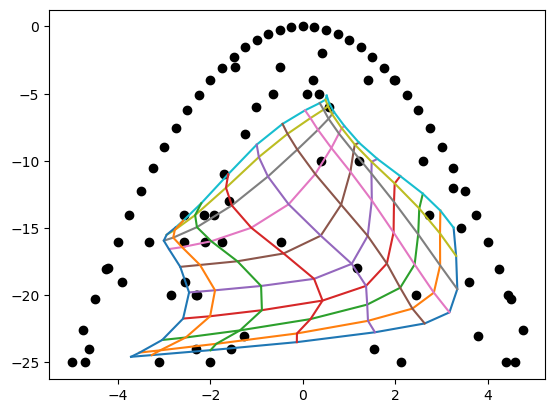

На 10-й эпохе


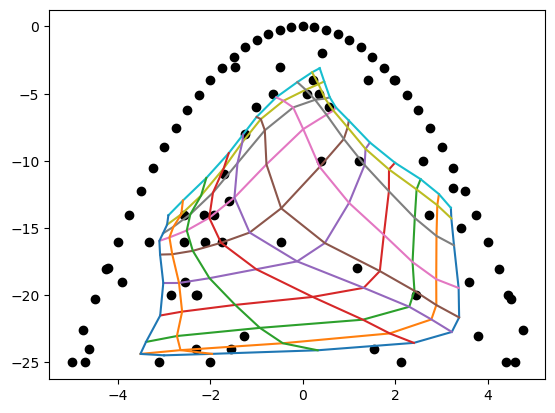

На 15-й эпохе


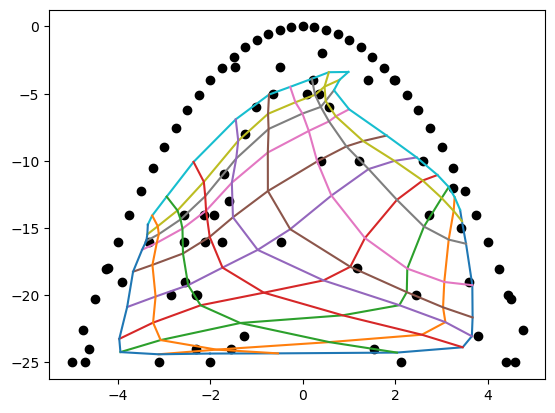

На 20-й эпохе


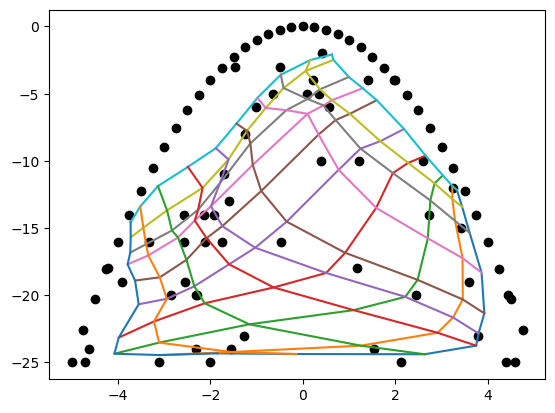

На 40-й эпохе


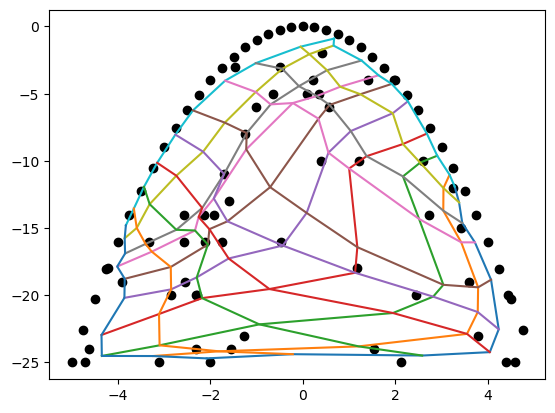

На 60-й эпохе


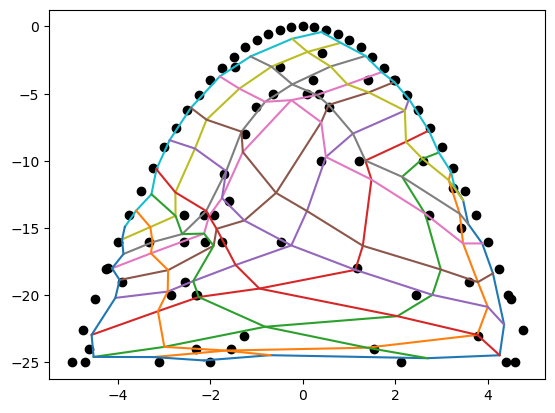

На 80-й эпохе


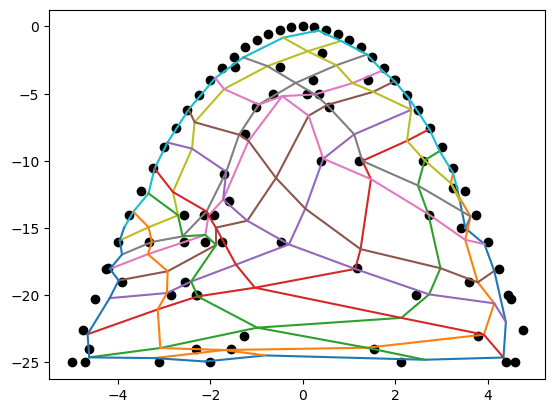

На 100-й эпохе


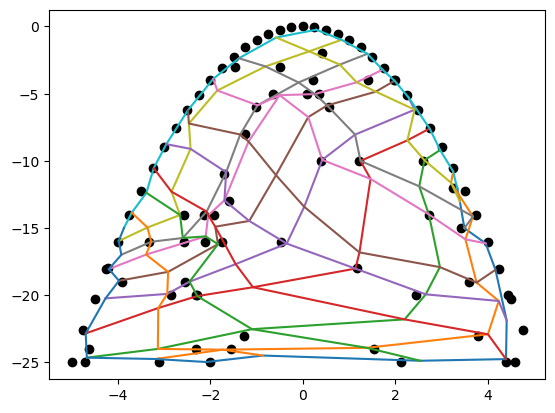

In [10]:
#X = np.arange(-5, 5, 0.25)
#X = np.column_stack((X, -X**2))
SOFM = np.random.normal(size=(10, 10, 2))
SOFM = Training(X, SOFM, 5, 100) #аппроксимируем отрицательную параболу

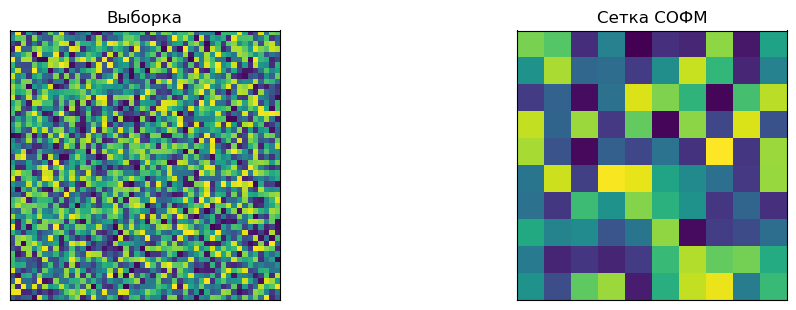

На 5-й эпохе


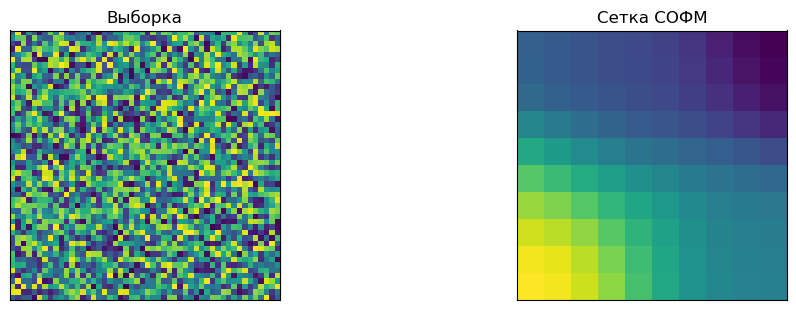

На 10-й эпохе


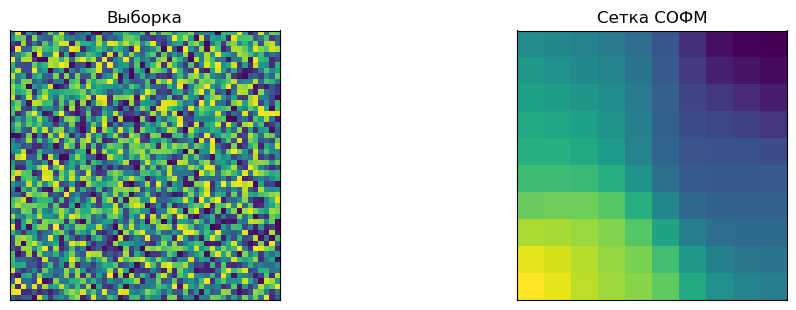

На 15-й эпохе


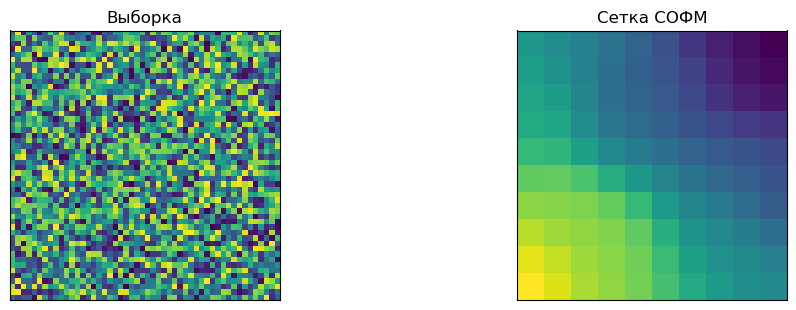

На 20-й эпохе


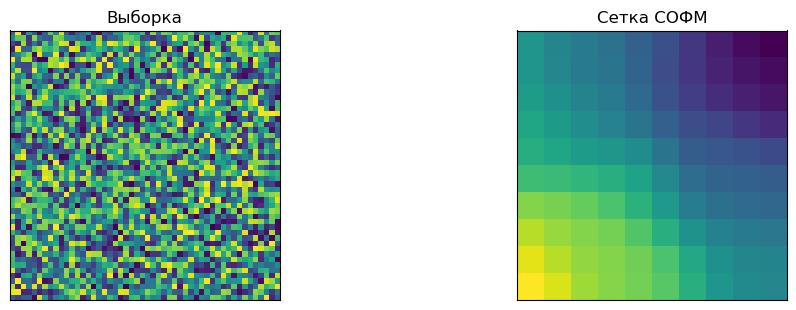

На 40-й эпохе


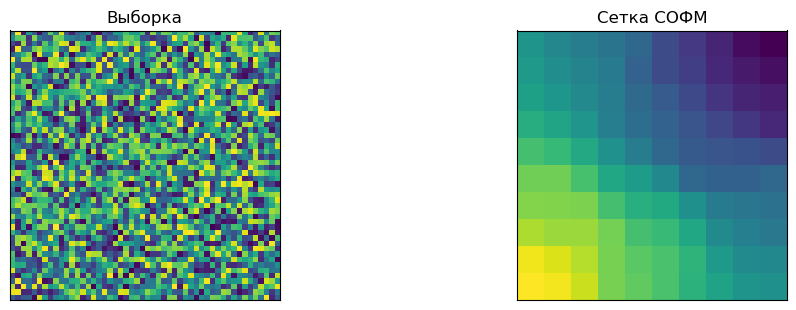

На 50-й эпохе


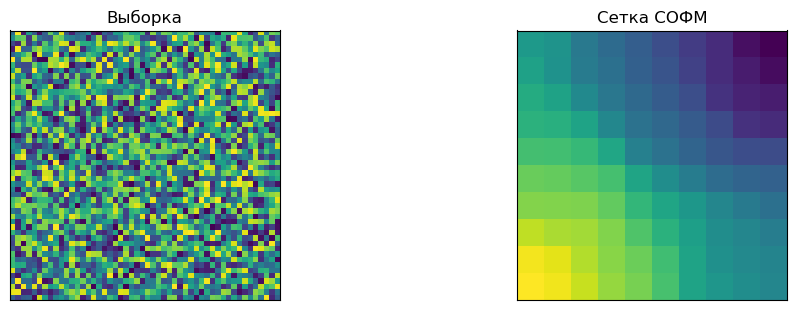

In [11]:
X = np.random.RandomState().randint(0, 255, (2500, 1)) #когда цвет 1
#X = np.full((100, 3), 150)
SOFM = np.random.RandomState().randint(0, 255, (10, 10, 1)).astype(float)
SOFM = Training(X, SOFM, 5, 50, par='img') 